In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd
import numpy as np

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 256
LEARNING_RATE = 2e-5
NAME = 'distil(roberta)-urdu'
MODEL_NAME = 'distilroberta-base'
dir = '../../../Dataset Statistics/dataset'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مَیں نے اپنا رُجحان بری کر دیا مگر وہ ہمیشہ پہلے غار میں کھڑا رہتا تھا 1
@اناسکر نے آپ کو اپنی نفرت اور حسد کے ساتھ دیکھ کر بہت سے مسلمان یہودی بھی امن میں رہتے ہیں، یہاں تک کہ آج بھی بہت سے مسلمان ہیں، یہاں تک کہ عربوں کے ساتھ امن و سلامتی بھی، یہ مذہب ہم پر نہیں ہے۔ 1
@وہن: آپ کو ضرور ضرور کرنا ہوگا! میں نے کرسمس کے ایک شخص کو اس میں سے ایک تھا کہ یہ میرے بیگ میں کئی سال سے نہیں ملا تھا۔ 0
@NNx] ہم ان کے جواب سننے کے لئے انتظار کر رہے ہیں (کہ وہ آپ سے کیا پوچھے گا)۔ 0
میں اس پروجیکٹ سے بہت متاثر ہوں، امید ہے کہ اس واقعے اور خاص طور پر یہ خزانہ کامیابی حاصل کرے گا. 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

مَیں نے اپنا رُجحان بری کر دیا مگر وہ ہمیشہ پہلے غار میں کھڑا رہتا تھا 1
اناسکر نے آپ کو اپنی نفرت حسد ساتھ دیکھ کر بہت سے مسلمان یہودی بھی امن میں رہتے ہیں، یہاں بھی بہت سے مسلمان ہیں، یہاں عربوں ساتھ امن سلامتی بھی، مذہب ہم نہیں ہے۔ 1
وہن آپ کو کرنا ہوگا میں نے کرسمس شخص کو اس میں سے تھا میرے بیگ میں سال سے نہیں ملا تھا۔ 0
nnx ہم ان جواب سننے انتظار کر وہ آپ سے کیا پوچھے گا۔ 0
میں اس پروجیکٹ سے بہت متاثر ہوں، امید اس واقعے خاص خزانہ کامیابی حاصل گا 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = AutoTokenizer.from_pretrained("distilroberta-base")
model = AutoModelForSequenceClassification.from_pretrained("distilroberta-base", num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.92it/s, loss=0.645]


Train loss 0.6643982065771414 accuracy 0.5551195264724157
Validation loss 0.6272026315331459 accuracy 0.6080643578926714
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.6080643578926714
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.94it/s, loss=0.621]


Train loss 0.624660121596508 accuracy 0.6111874162006606
Validation loss 0.6102402955293655 accuracy 0.6349455508682429
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.6349455508682429
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 239/239 [01:24<00:00,  2.83it/s, loss=0.634]


Train loss 0.605249954566796 accuracy 0.6377906406357304
Validation loss 0.6027688063681126 accuracy 0.6489257333464142
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.6489257333464142
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 239/239 [01:37<00:00,  2.46it/s, loss=0.604]


Train loss 0.5913136828394614 accuracy 0.655400765231041
Validation loss 0.5915344826877117 accuracy 0.665309526145394
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.665309526145394
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 239/239 [01:24<00:00,  2.83it/s, loss=0.589]


Train loss 0.5785399820016518 accuracy 0.6703456620556592
Validation loss 0.584240847826004 accuracy 0.6704601196899833
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.6704601196899833
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 239/239 [01:24<00:00,  2.82it/s, loss=0.583]


Train loss 0.56575938099099 accuracy 0.6834265345498545
Validation loss 0.5854752495884895 accuracy 0.674384381438242
Model and tokenizer saved at epoch 6
Checkpoint saved: Improved validation accuracy at epoch 6: 0.674384381438242
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 239/239 [01:25<00:00,  2.80it/s, loss=0.57] 


Train loss 0.5552287847427144 accuracy 0.6930900291049413
Validation loss 0.5827278308570385 accuracy 0.6795349749828313
Model and tokenizer saved at epoch 7
Checkpoint saved: Improved validation accuracy at epoch 7: 0.6795349749828313
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 239/239 [01:25<00:00,  2.79it/s, loss=0.554]


Train loss 0.5459012743319428 accuracy 0.70187056476667
Validation loss 0.5818962700664997 accuracy 0.6837045030903561
Model and tokenizer saved at epoch 8
Checkpoint saved: Improved validation accuracy at epoch 8: 0.6837045030903561
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 239/239 [01:19<00:00,  2.99it/s, loss=0.557]


Train loss 0.5382182937286888 accuracy 0.7097681415350404
Validation loss 0.579622606933117 accuracy 0.686402433042284
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.686402433042284
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 239/239 [01:24<00:00,  2.84it/s, loss=0.542]


Train loss 0.5278319247596932 accuracy 0.7155564276137218
Validation loss 0.5851992517709732 accuracy 0.6876287648386148
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.6876287648386148
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 239/239 [01:24<00:00,  2.82it/s, loss=0.526]


Train loss 0.5198541262409179 accuracy 0.7231760358415906
Validation loss 0.5983777865767479 accuracy 0.6899342686157167
Model and tokenizer saved at epoch 11
Checkpoint saved: Improved validation accuracy at epoch 11: 0.6899342686157167
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 239/239 [01:24<00:00,  2.83it/s, loss=0.507]


Train loss 0.5109209970699693 accuracy 0.7302233558978384
Validation loss 0.5962908923625946 accuracy 0.6900814284312764
Model and tokenizer saved at epoch 12
Checkpoint saved: Improved validation accuracy at epoch 12: 0.6900814284312764
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 239/239 [01:26<00:00,  2.77it/s, loss=0.509]


Train loss 0.5020873984282984 accuracy 0.7379247195787959
Validation loss 0.6134598217904568 accuracy 0.6924850387520848
Model and tokenizer saved at epoch 13
Checkpoint saved: Improved validation accuracy at epoch 13: 0.6924850387520848
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 239/239 [01:25<00:00,  2.81it/s, loss=0.506]


Train loss 0.4931327123272868 accuracy 0.7424539716799111
Validation loss 0.6066827595233917 accuracy 0.6893946826253311
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.95it/s, loss=0.49] 


Train loss 0.484206369357129 accuracy 0.7477844272212957
Validation loss 0.620712797343731 accuracy 0.6896890022564506
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 15
Epoch 16/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.94it/s, loss=0.468]


Train loss 0.4731861417762405 accuracy 0.7556820039896661
Validation loss 0.6273839965462684 accuracy 0.68998332188757
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 16
Epoch 17/50
----------


Training Progress: 100%|██████████| 239/239 [01:21<00:00,  2.94it/s, loss=0.465]


Train loss 0.46640969582182595 accuracy 0.7597043722816312
Validation loss 0.6253367207944394 accuracy 0.6875306582949083
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 17
Epoch 18/50
----------


Training Progress: 100%|██████████| 239/239 [01:20<00:00,  2.96it/s, loss=0.454]


Train loss 0.45717415787186083 accuracy 0.7669315543346742
Validation loss 0.6368657022714614 accuracy 0.6883645639164132
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


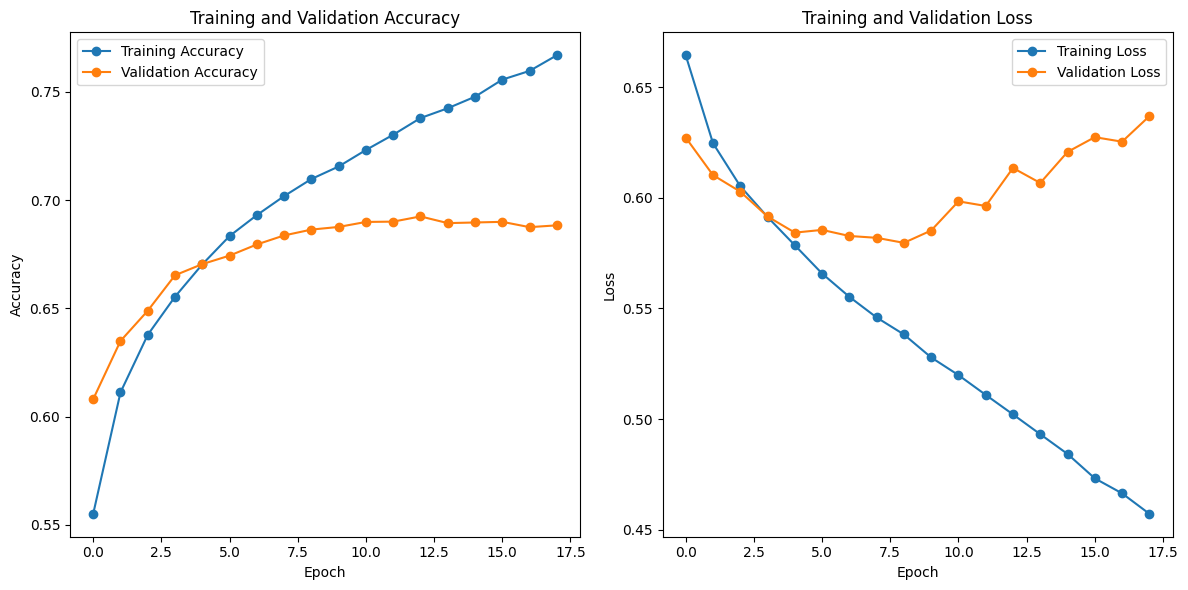

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.6855839505567274 Test Loss: 0.6430347822606564


Accuracy: 0.69
F1 Score: 0.69
Precision: 0.69
Recall: 0.69

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.69      0.68      0.68     10179
        Hate       0.69      0.69      0.69     10208

    accuracy                           0.69     20387
   macro avg       0.69      0.69      0.69     20387
weighted avg       0.69      0.69      0.69     20387



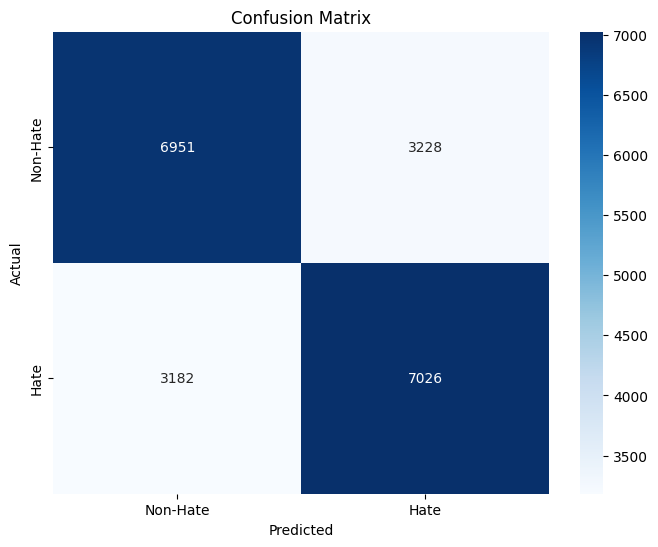

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Not Hate Speech 
Confidence: 0.83
